<a href="https://colab.research.google.com/github/john-s-butler-dit/CaseStudy_PredatorPrey/blob/master/06_Snow%20Hares%20and%20Lynxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predator-Prey Population Differential Equations


In this notebook we will model the interaction of Lynx and Hare populations [1].

In [1]:
## Library
import numpy as np
import math 
import matplotlib.pyplot as plt
# @title Figure Settings
import IPython.display as ipd
from matplotlib import gridspec

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'

# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")
my_layout = widgets.Layout()

## Predators and prey
The cyclical relationship of Predators and Prey in the wild  means that when there is an abundance of prey, the predators will eat more and their population will increase. On the other hand, if there is a shortage in the number of prey, the number of predators will decrease. One of the of the most famous examples of this was observed by the fur traders  Hudson's Bay Company of Canada. The company collected data about the number of lynx and hare pelts they purchased over a 90 year period. Their data showed the cylical nature of the predator prey relationship.
This kind of behaviour has been observed in many pairs of predators and prey from mammals to fish to beyond. 

## Snow Hares and Lynxes
In a balanced eco system the relationship between snow hares (prey) and lynxes (predator) can be described mathematically using a Loketta-Volterra model [1-3]
\begin{equation}
\begin{array}{cl}
\frac{d H}{dt}=a_{Birth} H-b_{Con}LH,\\
\frac{d L}{dt}=-c_{Death}L+d_{Food} L H,\\
\end{array}
\end{equation}
this set of equations models the interaction between snow hares (H) and lynxes (L). The lynes are the predators who eat the snow hares to survive. Where there parameters 
* $a_{Birth}$ is the birth rate of the snow hares;
* $b_{Con}$ is the consumation rate of snow hares by lynxes (interaction);
* $c_{Death}$ is the death rate of lynxes if there is no food source;
* $d_{Food}$ is the rate that lynxes eat the snow hares to survive (interaction).


## Discrete Domain 
To numiercally approximate the solution we discretise the continuous domain using a step size, $h=1$, 
which gives
\begin{equation}
t_i=0+i h,
\end{equation}
for $i=0,...10$.
The figure below illustrate the discrete domain.

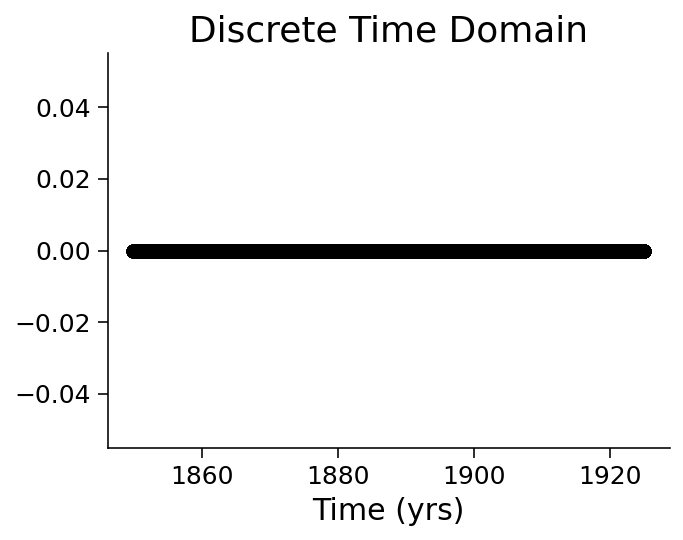

In [2]:
h=0.001
t=np.arange(1850,1925+h/2,h)
fig = plt.figure(1,figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.plot(t,0*t,'o:',color='k')
ax.set_xlabel('Time (yrs)')
plt.title('Discrete Time Domain')
plt.show()

We numerically approximate the differential equation using Eulers method to give the difference equation
\begin{equation}
H[i+1] = H[i]+ h*\big(a_{Birth}*H[i]-b_{Con}*H[i]*L[i] \big)
\end{equation}

\begin{equation}
L[i+1] = L[i]+ h*\big(-c_{Death}*H[i]+d_{Food}*H[i]*L[i] \big)
\end{equation}
where $h$ is the stepsize and  $H[i]$ and $L[i]$ is the numerical approximation of the hare $H(t_i)$ and Lynx $L(t_i)$ at time $t_i$, for $i=0,...,N$


In [3]:
def Lynx_Hare(a_Birth,b_Con,c_Death,d_Food):
    """
    Args:
    a_Birth=0.4
    b_Con=0.1
    c_Death=0.09
    d_Food=0.01
    """
    h=0.01
    t=np.arange(1850,1925+h/2,h)

    N=len(t) # Number of Steps
    H=np.zeros(N) # Numerical Solution Hares
    H[0]=6 # Intial Hare population
    L=np.zeros(N) # Numerical Solution Lynxes
    L[0]=2# Initial Lynx population


    for i in range (0,N-1):
        H[i+1]=H[i]+h*(a_Birth*H[i]-b_Con*H[i]*L[i])# INSERT EQUATION HERE 
        L[i+1]=L[i]+h*(-c_Death*L[i]+d_Food*H[i]*L[i])# INSERT EQUATION HERE 

    ## Plotting Figure
    fig, [ax1, ax2] =plt.subplots(1,2,figsize=(16,4), gridspec_kw={'width_ratios': [2, 1]})


    ax1.plot(t,H,':',color='green',label='Hares')
    ax1.plot(t,L,':',color='red',label='Lynxes')

    ax1.legend()
    ax1.set_xlabel('Time (yrs)')
    ax1.set_ylabel('Population (tens of thousands)')
    #ax.legend(loc='best')
 
    ax2.plot(H,L,'-',color='black')

    ax2.set_ylabel('Lynx population (tens of thousands)')
    ax2.set_xlabel('Hare Population (tens of thousands)')
    #ax.legend(loc='best')
    ax2.set_ylim(0.9*np.min(L),1.1*np.max(L))
    ax2.set_xlim(0.9*np.min(H),1.1*np.max(H))

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

## Results
The figure below plots the numerical approximation of the Hare population (green) and the Lynx poulation (red) as a function of time in years between 1850 and 1925.
The figure illustrates the oscilatory nature of the Hare and Lynx populations.
The hare population fluctuates from close to 0 to 800 ten of thousands.
The lynx population fluctuates from close to 0 to 120 ten of thousands.
The peak hare population preceeds the lynx population by about half a year.
There is a gradual increase of peak populations over time.
The model is similar to the observed data by the Hudson Bay Company.


## Phase Plane Plot
The phase plane plot below illustrates the population of Hares as a function of Lynxes. This removes time from out plot.
The rate of change of hares as function of the rate of lynxes is written as
\begin{equation}
\frac{d H}{dL}=\frac{a_{Birth} H-b_{Con}LH}{-c_{Death}L+d_{Food} L H}.
\end{equation}

The plot below shows a stable cyclical relationship between hares and lynxes.
It looks a bit like an orbit of a moon.

In [4]:
my_layout.width = '450px'
@widgets.interact(
    a_Birth=widgets.FloatSlider(0.4, min=0., max=1., step=.01, layout=my_layout),
    b_Con=widgets.FloatSlider(0.1, min=0.00, max=0.5, step=.01, layout=my_layout),
    c_Death=widgets.FloatSlider(0.09, min=0., max=0.1, step=.001, layout=my_layout),
    d_Food=widgets.FloatSlider(.01, min=0.00, max=0.5, step=.01, layout=my_layout)

)
def Pop_widget(a_Birth,b_Con,c_Death,d_Food):
  Lynx_Hare(a_Birth=a_Birth,b_Con=b_Con,c_Death=c_Death,d_Food=d_Food)
  plt.show()

interactive(children=(FloatSlider(value=0.4, description='a_Birth', layout=Layout(width='450px'), max=1.0, ste…

# References

[1] Stover, Christopher and Weisstein, Eric W. "Population Growth." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/PopulationGrowth.html

[2]  Vito Volterra.  Fluctuations in the abundance of a species considered mathematically. Nature,118:558–560,1926.

[3] Alfred J Lotka.   Analytical note on certain rhythmic  relations inorganic  systems.Proceedings of the National Academy of Sciences,6(7):410–415,1920.